# Algoritmo PCA

El algoritmo PCA (Análisis de Componentes Principales) permite encontrar una representación de baja dimensionalidad $\mathbf{y_i}$ que explica la varianza de los datos originales $\mathbf{x_i}$. 

\begin{align*}
\mathbf{y_i}=U^T (\mathbf{x_i}-\mu)\\
\tilde{\mathbf{x_i}}=U \mathbf{y_i} +\mu
\end{align*}

In [3]:
using LinearAlgebra; 
using MultivariateStats;
using Statistics;

X=[ 7  4  3;
    4  1  8; 
    6  3  5;
    8  6  1;
    8  5  7;
    7  2  9;
    5  3  3;
    9  5  8;
    7  4  5;
    8  2  2];
μ=mean!([1. 1. 1.],X)
X_m=(X.-μ)
M = fit(PCA, transpose(X_m),maxoutdim=3)
Yte = transform(M, transpose(X_m))
X_r=transpose(reconstruct(M, Yte)).+μ
E=norm(X-X_r)

2.7733362266239673e-15

In [4]:
M

PCA(indim = 3, outdim = 3, principalratio = 1.0)

Pattern matrix (unstandardized loadings):
──────────────────────────────────
         PC1       PC2         PC3
──────────────────────────────────
1  -0.395715  1.34028   -0.607685
2  -0.720434  1.26714    0.612646
3   2.75651   0.523582   0.0728826
──────────────────────────────────

Importance of components:
────────────────────────────────────────────────────────
                                PC1       PC2        PC3
────────────────────────────────────────────────────────
SS Loadings (Eigenvalues)  8.27394   3.67613   0.749928
Variance explained         0.651492  0.289459  0.0590495
Cumulative variance        0.651492  0.940951  1.0
Proportion explained       0.651492  0.289459  0.0590495
Cumulative proportion      0.651492  0.940951  1.0
────────────────────────────────────────────────────────

In [5]:
typeof(X_m)

Matrix{Float64} (alias for Array{Float64, 2})

In [6]:
values,vectors=eigen(cov(X_m));

ErrorException: cannot assign a value to imported variable Base.values from module Main

In [7]:
U=[vectors[:,3] vectors[:,2]]
V=sort(values[2:3],rev=true)
U_s=sqrt.(V)'.*U

UndefVarError: UndefVarError: `vectors` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [8]:
U

UndefVarError: UndefVarError: `U` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [9]:
M.prinvars

3-element Vector{Float64}:
 8.273942580407862
 3.6761292667973366
 0.7499281527948027

In [10]:
V

UndefVarError: UndefVarError: `V` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [11]:
M.proj

3×3 Matrix{Float64}:
 -0.137571  -0.699037   0.701727
 -0.25046   -0.660889  -0.707457
  0.958303  -0.27308   -0.0841616

In [12]:
imp=V./sum(V)
print("Proportion explained : $imp")

UndefVarError: UndefVarError: `V` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [13]:
Y_t=transpose(U)*transpose(X_m)
X_r2=transpose(U*Y_t).+μ

UndefVarError: UndefVarError: `U` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [14]:
transpose(U)

UndefVarError: UndefVarError: `U` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [15]:
using Plots;

plot(sort(values,rev=true))

MethodError: MethodError: no method matching sort(::typeof(values); rev::Bool)
The function `sort` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  sort(!Matched::AbstractUnitRange) got unsupported keyword argument "rev"
   @ Base range.jl:1397
  sort(!Matched::AbstractRange) got unsupported keyword argument "rev"
   @ Base range.jl:1400
  sort(!Matched::OrderedCollections.LittleSet{T, <:Tuple}; ks...) where T
   @ OrderedCollections C:\Users\juanr\.julia\packages\OrderedCollections\Xihhq\src\little_set.jl:135
  ...


In [16]:
norm(X-X_r)

2.7733362266239673e-15

# EigenFaces

En el caso del reconocimiento facial, el algoritmo Eigenfaces utiliza esta representación de baja dimensionalidad para comparar caras nuevas (no utilizadas para ajustar los valores y vectores propios). Sin embargo, una de los problemas al utlizar esta técnica es determinar la dimensionalidad \emph{intrinsica} de los datos. Esto quiere decir que el número de componentes principales es desconocido y debe determinarse mediante un compromiso entre el error de reconstrucción $E=\sum_i^n (\mathbf{x_i}-\tilde{\mathbf{x_i}})^2$ y la capacidad de comprimir y explicar los datos.

https://bio322.epfl.ch/notebooks/pca.html

In [17]:
using Images,Colors
using ImageTransformations

path="eigenvalue_pics/"
dim=64

function images_to_mat(pathlist,dim,data_type)
    mat=zeros(data_type,length(pathlist),dim*dim)
    for (index,images) in enumerate(pathlist)
        img=load(images)
        img_g=Gray.(img)
        img_g=imresize(img_g,dim,dim)
        img_g=data_type.(img_g)
        img_g=reshape(img_g,(1,dim*dim))
        mat[index,:]=img_g
    end 
    return mat
end



images_to_mat (generic function with 1 method)

In [18]:
pathlist=[]
names=[]
for d in readdir(path)
    for f in readdir(path*d)
        file_path=path*d*"/"*f
        push!(pathlist,file_path)
        push!(names,d)
    end 
end 

Base.IOError: IOError: readdir("eigenvalue_pics/"): no such file or directory (ENOENT)

In [19]:
using LinearAlgebra; 
using MultivariateStats;
using Statistics;

my_type=Float64
mat=images_to_mat(pathlist,dim,my_type)
mean_face=mean!(transpose(ones(dim*dim)),mat)
centered_mat=mat.-my_type.(mean_face);

In [20]:
values,vectors=eigen(cov(centered_mat));

ErrorException: cannot assign a value to imported variable Base.values from module Main

In [21]:
typeof(vectors)

UndefVarError: UndefVarError: `vectors` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [22]:
sorted_values=sort(values,rev=true);

MethodError: MethodError: no method matching sort(::typeof(values); rev::Bool)
The function `sort` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  sort(!Matched::AbstractUnitRange) got unsupported keyword argument "rev"
   @ Base range.jl:1397
  sort(!Matched::AbstractRange) got unsupported keyword argument "rev"
   @ Base range.jl:1400
  sort(!Matched::OrderedCollections.LittleSet{T, <:Tuple}; ks...) where T
   @ OrderedCollections C:\Users\juanr\.julia\packages\OrderedCollections\Xihhq\src\little_set.jl:135
  ...


In [23]:
length(sorted_values)

UndefVarError: UndefVarError: `sorted_values` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [24]:
using Plots;

sorted_values=sorted_values./sum(sorted_values)
plot(sorted_values[1:100],lw=3)

UndefVarError: UndefVarError: `sorted_values` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [25]:
size(vectors)

UndefVarError: UndefVarError: `vectors` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [26]:
num_components=25

25

In [27]:
eigenfaces=vectors[:,dim*dim:-1:(dim*dim-num_components+1)];

UndefVarError: UndefVarError: `vectors` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [28]:
size(eigenfaces)

UndefVarError: UndefVarError: `eigenfaces` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [29]:
P=transpose(eigenfaces)*transpose(centered_mat);

UndefVarError: UndefVarError: `eigenfaces` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [30]:
size(mat)

(0, 4096)

In [31]:
size(P)

UndefVarError: UndefVarError: `P` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

# Error de predicción

In [55]:
img=load("test.jpg")
img_g=Gray.(img)
img_g=imresize(img_g,dim,dim)

ArgumentError: ArgumentError: No file exists at given path: test.jpg

In [56]:
x_i=reshape(my_type.(img_g),(1,dim*dim))-mean_face
P_i=transpose(eigenfaces)*transpose(x_i);

UndefVarError: UndefVarError: `img_g` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [57]:
size(eigenfaces)

UndefVarError: UndefVarError: `eigenfaces` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [58]:
eigenfaces

UndefVarError: UndefVarError: `eigenfaces` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [59]:
dist=[]
for i in 1:22
    push!(dist,norm(P[:,i]-P_i))
end
pred=names[argmin(dist)]
print("La persona es : $pred")

UndefVarError: UndefVarError: `P` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

# Cuantización

In [60]:
function quantization(x, s, z, alpha_q, beta_q)
    x_q=((1 / s) * x).+z
    x_q = round.(x_q)
    x_q = clamp.(x_q, alpha_q, beta_q)
    return x_q
end

function quantization_int8(x, s, z)
    x_q = quantization(x, s, z, alpha_q=-128, beta_q=127)
    x_q = Int8.(x_q)
    return x_q
end

function dequantization(x_q, s, z)
    # x_q - z might go outside the quantization range.
    x_q = Float32.(x_q)
    x = s * (x_q .- z)
    x = Float32.(x)
    return x
end

function generate_quantization_constants(alpha, beta, alpha_q, beta_q)
    # Affine quantization mapping
    s = (beta - alpha) / (beta_q - alpha_q)
    z = ((beta * alpha_q - alpha * beta_q) / (beta - alpha))
    return s, z
end

generate_quantization_constants (generic function with 1 method)

In [61]:
b=8
r=randn(10);

alpha=minimum(r)
beta=maximum(r)
alpha_q = -2^(b - 1)
beta_q = 2^(b - 1) - 1

s,z=generate_quantization_constants(alpha,beta,alpha_q,beta_q)
q_r=quantization(r,s,z,alpha_q,beta_q);

In [62]:
q_r

10-element Vector{Float64}:
  127.0
 -128.0
  -35.0
   -8.0
   36.0
   72.0
   77.0
 -106.0
   82.0
   23.0

In [63]:
for (i,j,k) in zip( dequantization(q_r,s,z),r,Int8.(round.(r)))
    println("valor original : $j, valor cuantizado $i, valor truncado : $k")
end

valor original : 1.612651964678017, valor cuantizado 1.612652, valor truncado : 2
valor original : -1.8850188431090997, valor cuantizado -1.8850188, valor truncado : -2
valor original : -0.6090383589357415, valor cuantizado -0.6093977, valor truncado : -1
valor original : -0.2322480093920132, valor cuantizado -0.23905611, valor truncado : 0
valor original : 0.36559625942121143, valor cuantizado 0.36446357, valor truncado : 0
valor original : 0.8625172267293458, valor cuantizado 0.8582524, valor truncado : 1
valor original : 0.929410604108245, valor cuantizado 0.92683417, valor truncado : 1
valor original : -1.5832763306117354, valor cuantizado -1.583259, valor truncado : -2
valor original : 0.999354509454743, valor cuantizado 0.9954159, valor truncado : 1
valor original : 0.18780091416329392, valor cuantizado 0.18615092, valor truncado : 0


In [64]:
error=norm(r-Int8.(round.(r)))

0.8582089063079852

In [65]:
error=norm(r-dequantization(q_r,s,z))

0.009530178403560918

In [66]:
r=eigenfaces[:,1]
alpha=minimum(r)
beta=maximum(r)
alpha_q = -2^(b - 1)
beta_q = 2^(b - 1) - 1

s,z=generate_quantization_constants(alpha,beta,alpha_q,beta_q)
q_r=quantization(r,s,z,alpha_q,beta_q);
q_r=Int8.(q_r)

UndefVarError: UndefVarError: `eigenfaces` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [67]:
q_r

10-element Vector{Float64}:
  127.0
 -128.0
  -35.0
   -8.0
   36.0
   72.0
   77.0
 -106.0
   82.0
   23.0

In [68]:
error=norm(r-dequantization(q_r,s,z))

0.009530178403560918

# Error de Reconstrucción

In [69]:
R=transpose(eigenfaces*P).+mean_face

UndefVarError: UndefVarError: `eigenfaces` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [70]:
R_i=transpose(eigenfaces*P_i).+mean_face

UndefVarError: UndefVarError: `eigenfaces` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [71]:
norm(mat-R)

UndefVarError: UndefVarError: `R` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

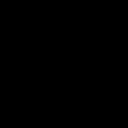

In [72]:
Gray.((reshape(mean_face,(dim,dim))))

In [73]:
Gray.((reshape(R_i,(dim,dim))))

UndefVarError: UndefVarError: `R_i` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [74]:
using OpenML, DataFrames
faces = OpenML.load(41083) |> DataFrame

Row,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,⋯
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.68595,0.702479,0.698347,0.694215,0.698347,0.690083,0.694215,0.690083,0.698347,0.702479,0.702479,0.698347,0.706612,0.710744,0.719008,0.727273,0.756198,0.772727,0.77686,0.77686,0.756198,0.760331,0.780992,0.760331,0.768595,0.756198,0.739669,0.743802,0.739669,0.743802,0.719008,0.719008,0.714876,0.719008,0.719008,0.72314,0.727273,0.735537,0.714876,0.72314,0.719008,0.714876,0.710744,0.702479,0.706612,0.698347,0.677686,0.657025,0.632231,0.566116,0.524793,0.446281,0.371901,0.330578,0.305785,0.342975,0.404959,0.438017,0.471074,0.553719,0.623967,0.669422,0.68595,0.690083,0.68595,0.694215,0.690083,0.698347,0.702479,0.698347,0.694215,0.706612,0.710744,0.710744,0.714876,0.710744,0.702479,0.719008,0.727273,0.735537,0.760331,0.77686,0.785124,0.780992,0.77686,0.772727,0.789256,0.785124,0.772727,0.764463,0.747934,⋯
2,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,0.710744,0.698347,0.702479,0.706612,0.706612,0.714876,0.714876,0.706612,0.698347,0.714876,0.698347,0.72314,0.731405,0.743802,0.756198,0.772727,0.768595,0.785124,0.764463,0.756198,0.731405,0.743802,0.735537,0.719008,0.706612,0.714876,0.719008,0.710744,0.710744,0.706612,0.702479,0.702479,0.702479,0.690083,0.681818,0.690083,0.68595,0.669422,0.677686,0.665289,0.652893,0.657025,0.640496,0.619835,0.615702,0.578512,0.5,0.359504,0.31405,0.214876,0.194215,0.190083,0.18595,0.18595,0.446281,0.483471,0.520661,0.566116,0.619835,0.665289,0.706612,0.710744,0.719008,0.714876,0.706612,0.698347,0.706612,0.702479,0.702479,0.694215,0.710744,0.710744,0.714876,0.72314,0.710744,0.727273,0.739669,0.743802,0.764463,0.756198,0.768595,0.768595,0.772727,0.752066,0.739669,0.735537,0.72314,0.714876,0.710744,0.690083,⋯
3,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.68595,0.702479,0.698347,0.702479,0.706612,0.706612,0.714876,0.710744,0.706612,0.706612,0.706612,0.72314,0.719008,0.719008,0.710744,0.710744,0.752066,0.756198,0.764463,0.785124,0.797521,0.838843,0.826446,0.842975,0.847107,0.830578,0.818182,0.793388,0.768595,0.760331,0.756198,0.739669,0.710744,0.719008,0.702479,0.702479,0.702479,0.706612,0.706612,0.719008,0.706612,0.710744,0.710744,0.706612,0.710744,0.702479,0.694215,0.690083,0.669422,0.636364,0.636364,0.599174,0.545455,0.475207,0.400826,0.355372,0.309917,0.309917,0.396694,0.479339,0.561983,